<a href="https://colab.research.google.com/github/gon-olmedo/data-science-cookbook/blob/main/Networkx/Who_owns_the_DJIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yfinance is a library that uses Yahoo's publicly available APIs to request financial data. We will need it for our example

In [1]:
%%capture
!pip install yfinance;

In [28]:
# import required assets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [3]:
import networkx as nx

# Example with 2 assets

We will use Apple and Microsoft stocks to build a small model

In [4]:
# retrieve Apple Data
var1 = yf.Ticker('AAPL')

In [5]:
# see whom owns Apple stock
# by calling the institutional_holders method
var1.institutional_holders.head()

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1272378901,2022-09-29,0.0803,172967190908
1,Blackrock Inc.,1020245185,2022-09-29,0.0644,138692132939
2,"Berkshire Hathaway, Inc",894802319,2022-09-29,0.0565,121639429429
3,State Street Corporation,591543874,2022-09-29,0.0374,80414475675
4,"FMR, LLC",350900116,2022-09-29,0.0222,47701362625


In [6]:
# store ownership on its own variable
apple = var1.institutional_holders

In [7]:
# add a column 'comp' with the ticker
apple['comp'] = var1.ticker

apple['comp']

0    AAPL
1    AAPL
2    AAPL
3    AAPL
4    AAPL
5    AAPL
6    AAPL
7    AAPL
8    AAPL
9    AAPL
Name: comp, dtype: object

In [8]:
# We will do the same for Microsoft
var2 = yf.Ticker('MSFT')

In [9]:
msft = var2.institutional_holders

In [10]:
msft['comp'] = var2.ticker

In [11]:
# we prepare one unified dataframe to use as data
tog_ = pd.concat([apple, msft])

tog_

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",1272378901,2022-09-29,0.0803,172967190908,AAPL
1,Blackrock Inc.,1020245185,2022-09-29,0.0644,138692132939,AAPL
2,"Berkshire Hathaway, Inc",894802319,2022-09-29,0.0565,121639429429,AAPL
3,State Street Corporation,591543874,2022-09-29,0.0374,80414475675,AAPL
4,"FMR, LLC",350900116,2022-09-29,0.0222,47701362625,AAPL
5,"Geode Capital Management, LLC",279758518,2022-09-29,0.0177,38030373619,AAPL
6,Price (T.Rowe) Associates Inc,224863541,2022-09-29,0.0142,30567950312,AAPL
7,Morgan Stanley,182728771,2022-09-29,0.0115,24840149575,AAPL
8,Northern Trust Corporation,176084862,2022-09-29,0.0111,23936976570,AAPL
9,Bank of America Corporation,142260591,2022-09-29,0.0090,19338905087,AAPL


In [56]:
# Networkx has an inbuilt function to create grpahs using pandas dataframes
# you need at least two columns for nodes
Gex = nx.from_pandas_edgelist(tog_,
                            source= 'Holder',
                            target= 'comp',
                            edge_attr=['Value'])

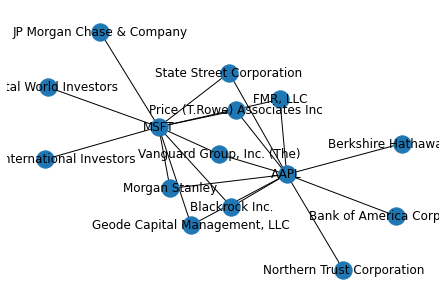

In [15]:
# Let's chart our graph and see the relations
nx.draw(Gex, with_labels=True)

Making the chart more readable

## Colorcoding nodes

In [57]:
# Node view of the graph
Gex.nodes()

NodeView(('Vanguard Group, Inc. (The)', 'AAPL', 'Blackrock Inc.', 'Berkshire Hathaway, Inc', 'State Street Corporation', 'FMR, LLC', 'Geode Capital Management, LLC', 'Price (T.Rowe) Associates Inc', 'Morgan Stanley', 'Northern Trust Corporation', 'Bank of America Corporation', 'MSFT', 'Capital World Investors', 'JP Morgan Chase & Company', 'Capital International Investors'))

In [45]:
# colorcoding by iterating through the nodes
# tickers as red, holder as yellow
colors = []

for node in Gex.nodes():
  # checks if the content of the node exist in our tickers column
  if node in tog_['comp'].values: 
    colors.append('tab:red')
  else:
    colors.append('tab:blue')

## Node size by Degrees

In [58]:
# degress tell hoe many relations each node element has
Gex.degree()

DegreeView({'Vanguard Group, Inc. (The)': 2, 'AAPL': 10, 'Blackrock Inc.': 2, 'Berkshire Hathaway, Inc': 1, 'State Street Corporation': 2, 'FMR, LLC': 2, 'Geode Capital Management, LLC': 2, 'Price (T.Rowe) Associates Inc': 2, 'Morgan Stanley': 2, 'Northern Trust Corporation': 1, 'Bank of America Corporation': 1, 'MSFT': 10, 'Capital World Investors': 1, 'JP Morgan Chase & Company': 1, 'Capital International Investors': 1})

In [39]:
sizes = []

for value in dict(Gex.degree()).values():
  sizes.append( 200 * value)

sizes

[400, 2000, 400, 200, 400, 400, 400, 400, 400, 200, 200, 2000, 200, 200, 200]

## Edges widths

In [65]:
nx.to_edgelist(Gex)

EdgeDataView([('Vanguard Group, Inc. (The)', 'AAPL', {'Value': 172967190908}), ('Vanguard Group, Inc. (The)', 'MSFT', {'Value': 152439279021}), ('AAPL', 'Blackrock Inc.', {'Value': 138692132939}), ('AAPL', 'Berkshire Hathaway, Inc', {'Value': 121639429429}), ('AAPL', 'State Street Corporation', {'Value': 80414475675}), ('AAPL', 'FMR, LLC', {'Value': 47701362625}), ('AAPL', 'Geode Capital Management, LLC', {'Value': 38030373619}), ('AAPL', 'Price (T.Rowe) Associates Inc', {'Value': 30567950312}), ('AAPL', 'Morgan Stanley', {'Value': 24840149575}), ('AAPL', 'Northern Trust Corporation', {'Value': 23936976570}), ('AAPL', 'Bank of America Corporation', {'Value': 19338905087}), ('Blackrock Inc.', 'MSFT', {'Value': 124704080693}), ('State Street Corporation', 'MSFT', {'Value': 71025721425}), ('FMR, LLC', 'MSFT', {'Value': 49052646983}), ('Geode Capital Management, LLC', 'MSFT', {'Value': 33519755042}), ('Price (T.Rowe) Associates Inc', 'MSFT', {'Value': 41183199378}), ('Morgan Stanley', 'MSF

In [79]:
widths = []

for item in nx.to_edgelist(Gex):
  widths.append(item[2]['Value'] / 50_000_000_000)

# check
widths[:5]

[3.45934381816, 3.04878558042, 2.77384265878, 2.43278858858, 1.6082895135]

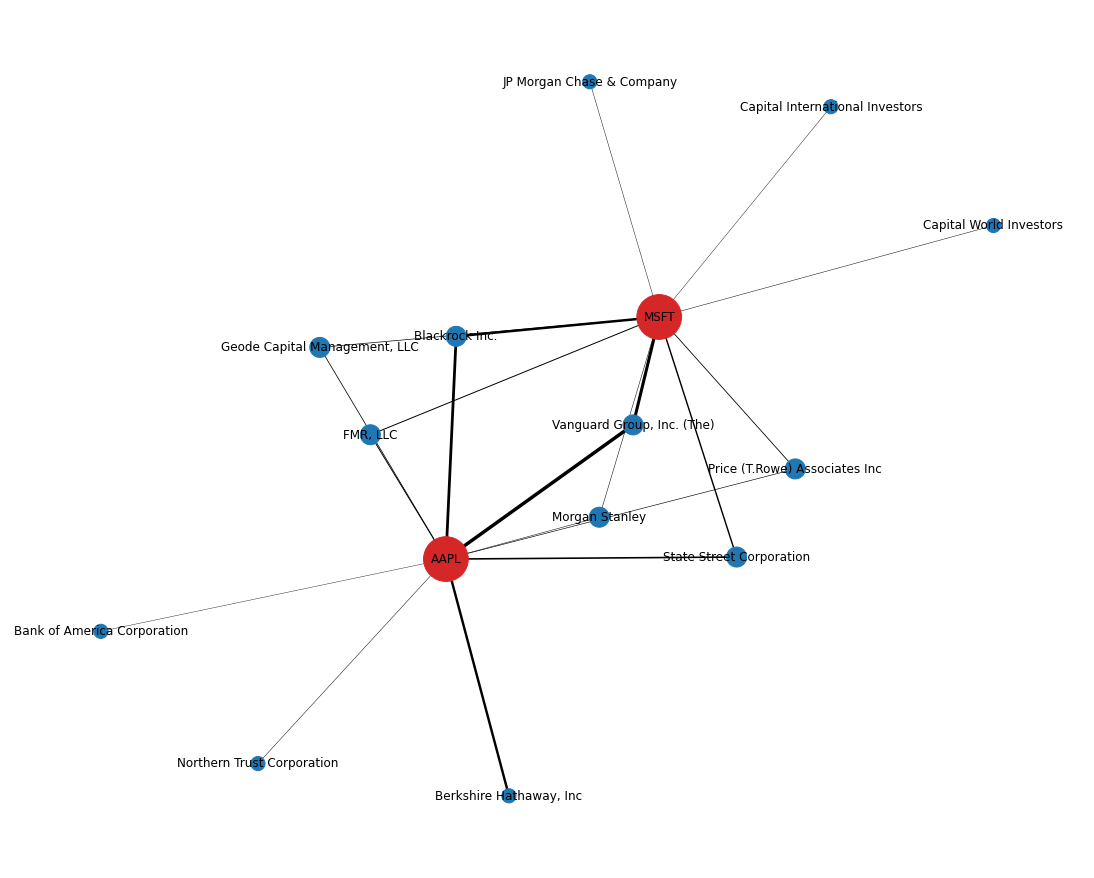

In [78]:
# change size
plt.figure(figsize=(15, 12))

# draw
nx.draw(Gex,
        with_labels=True,
        node_color=colors, # from our colorcoding list,
        node_size=sizes, # from our Nodesize by degree list
        width=widths # from our widths custom calculation
        )

# Using the Down Jones Industrial Average

In [49]:
# We will retrieve the list of tickers of the DJIA by scrapping the DJIA wikipedia page
djia = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

djia.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%


In [50]:
# we just need the tickers as a list
tickers = djia.Symbol.to_list()
tickers[:5]

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA']

In [51]:
# we will create a list of dataframes that contain the institutionals
# holder data for each ticker

frames = []

for ticker in tickers:
  var = yf.Ticker(ticker) # retrieve yahoo finance data for ticker
  frame = var.institutional_holders # create a frame only with the holders data
  frame['comp'] = var.ticker # add a column containing the ticker
  frames.append(frame)

In [52]:
# concatenate all our dataframes
all_tog = pd.concat(frames)

all_tog.head()

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",46376882,2022-09-29,0.0839,5871313190,MMM
1,Blackrock Inc.,42083570,2022-09-29,0.0761,5327779897,MMM
2,State Street Corporation,32405350,2022-09-29,0.0586,4102517260,MMM
3,"Charles Schwab Investment Management, Inc.",12016050,2022-09-29,0.0217,1521231911,MMM
4,"Geode Capital Management, LLC",10347138,2022-09-29,0.0187,1309947655,MMM


In [81]:
# Create chart object for Networksx
G = nx.from_pandas_edgelist(all_tog,
                            source= 'Holder',
                            target= 'comp',
                            edge_attr=['Value'])

In [91]:
# colorcoding by iterating through the nodes
# tickers as red, holder as yellow
colors = []

for node in G.nodes():
  # checks if the content of the node exist in our tickers column
  if node in all_tog['comp'].values: 
    colors.append('tab:red')
  else:
    colors.append('tab:blue')

In [83]:
sizes = []

for value in dict(G.degree()).values():
  sizes.append( 200 * value)

sizes[:5]

[6000, 2000, 6000, 6000, 1400]

In [84]:
widths = []

for item in nx.to_edgelist(G):
  widths.append(item[2]['Value'] / 50_000_000_000)

# check
widths[:5]

[0.1174262638, 0.14459085112, 0.2557308418, 3.45934381816, 0.1911156623]

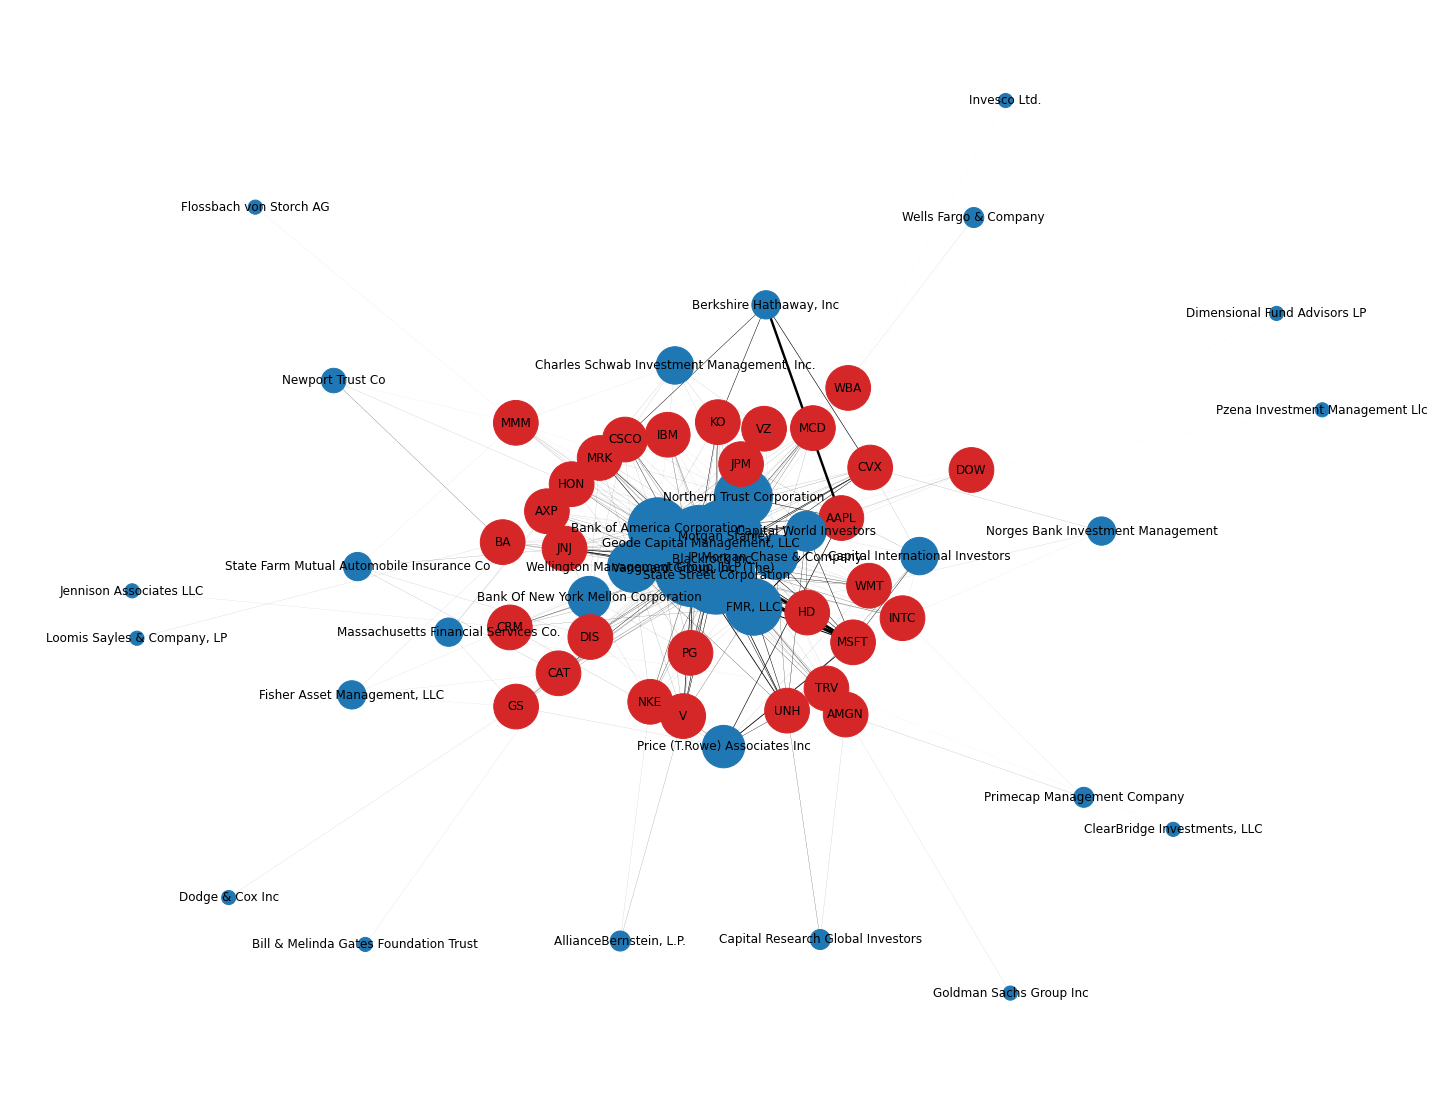

In [92]:
# let's chart

# draw
plt.figure(figsize=(20, 15))

nx.draw(G,
        with_labels=True,
        node_color=colors,
        node_size=sizes,
        width=widths)

